# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [5]:
#company['ShelveLoc'] : labels 0=Bad , 1=Good and  2=Medium
#company['Urban'] : labels 0 = No and 1 = Yes
#company['US'] : labels  0 = No and 1 = Yes

In [6]:
# splitting data into  x and y 
x = company.iloc[:,1:]
y = company.iloc[:,1]

In [7]:
# splitting into train and test data 
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.3,random_state=42)

In [8]:
# Decision tree using CART 

In [9]:
model = DecisionTreeRegressor(criterion='mse',splitter='best').fit(x_train,y_train)

C:\Users\Rohith Challam\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [10]:
fn =['CompPrice','Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

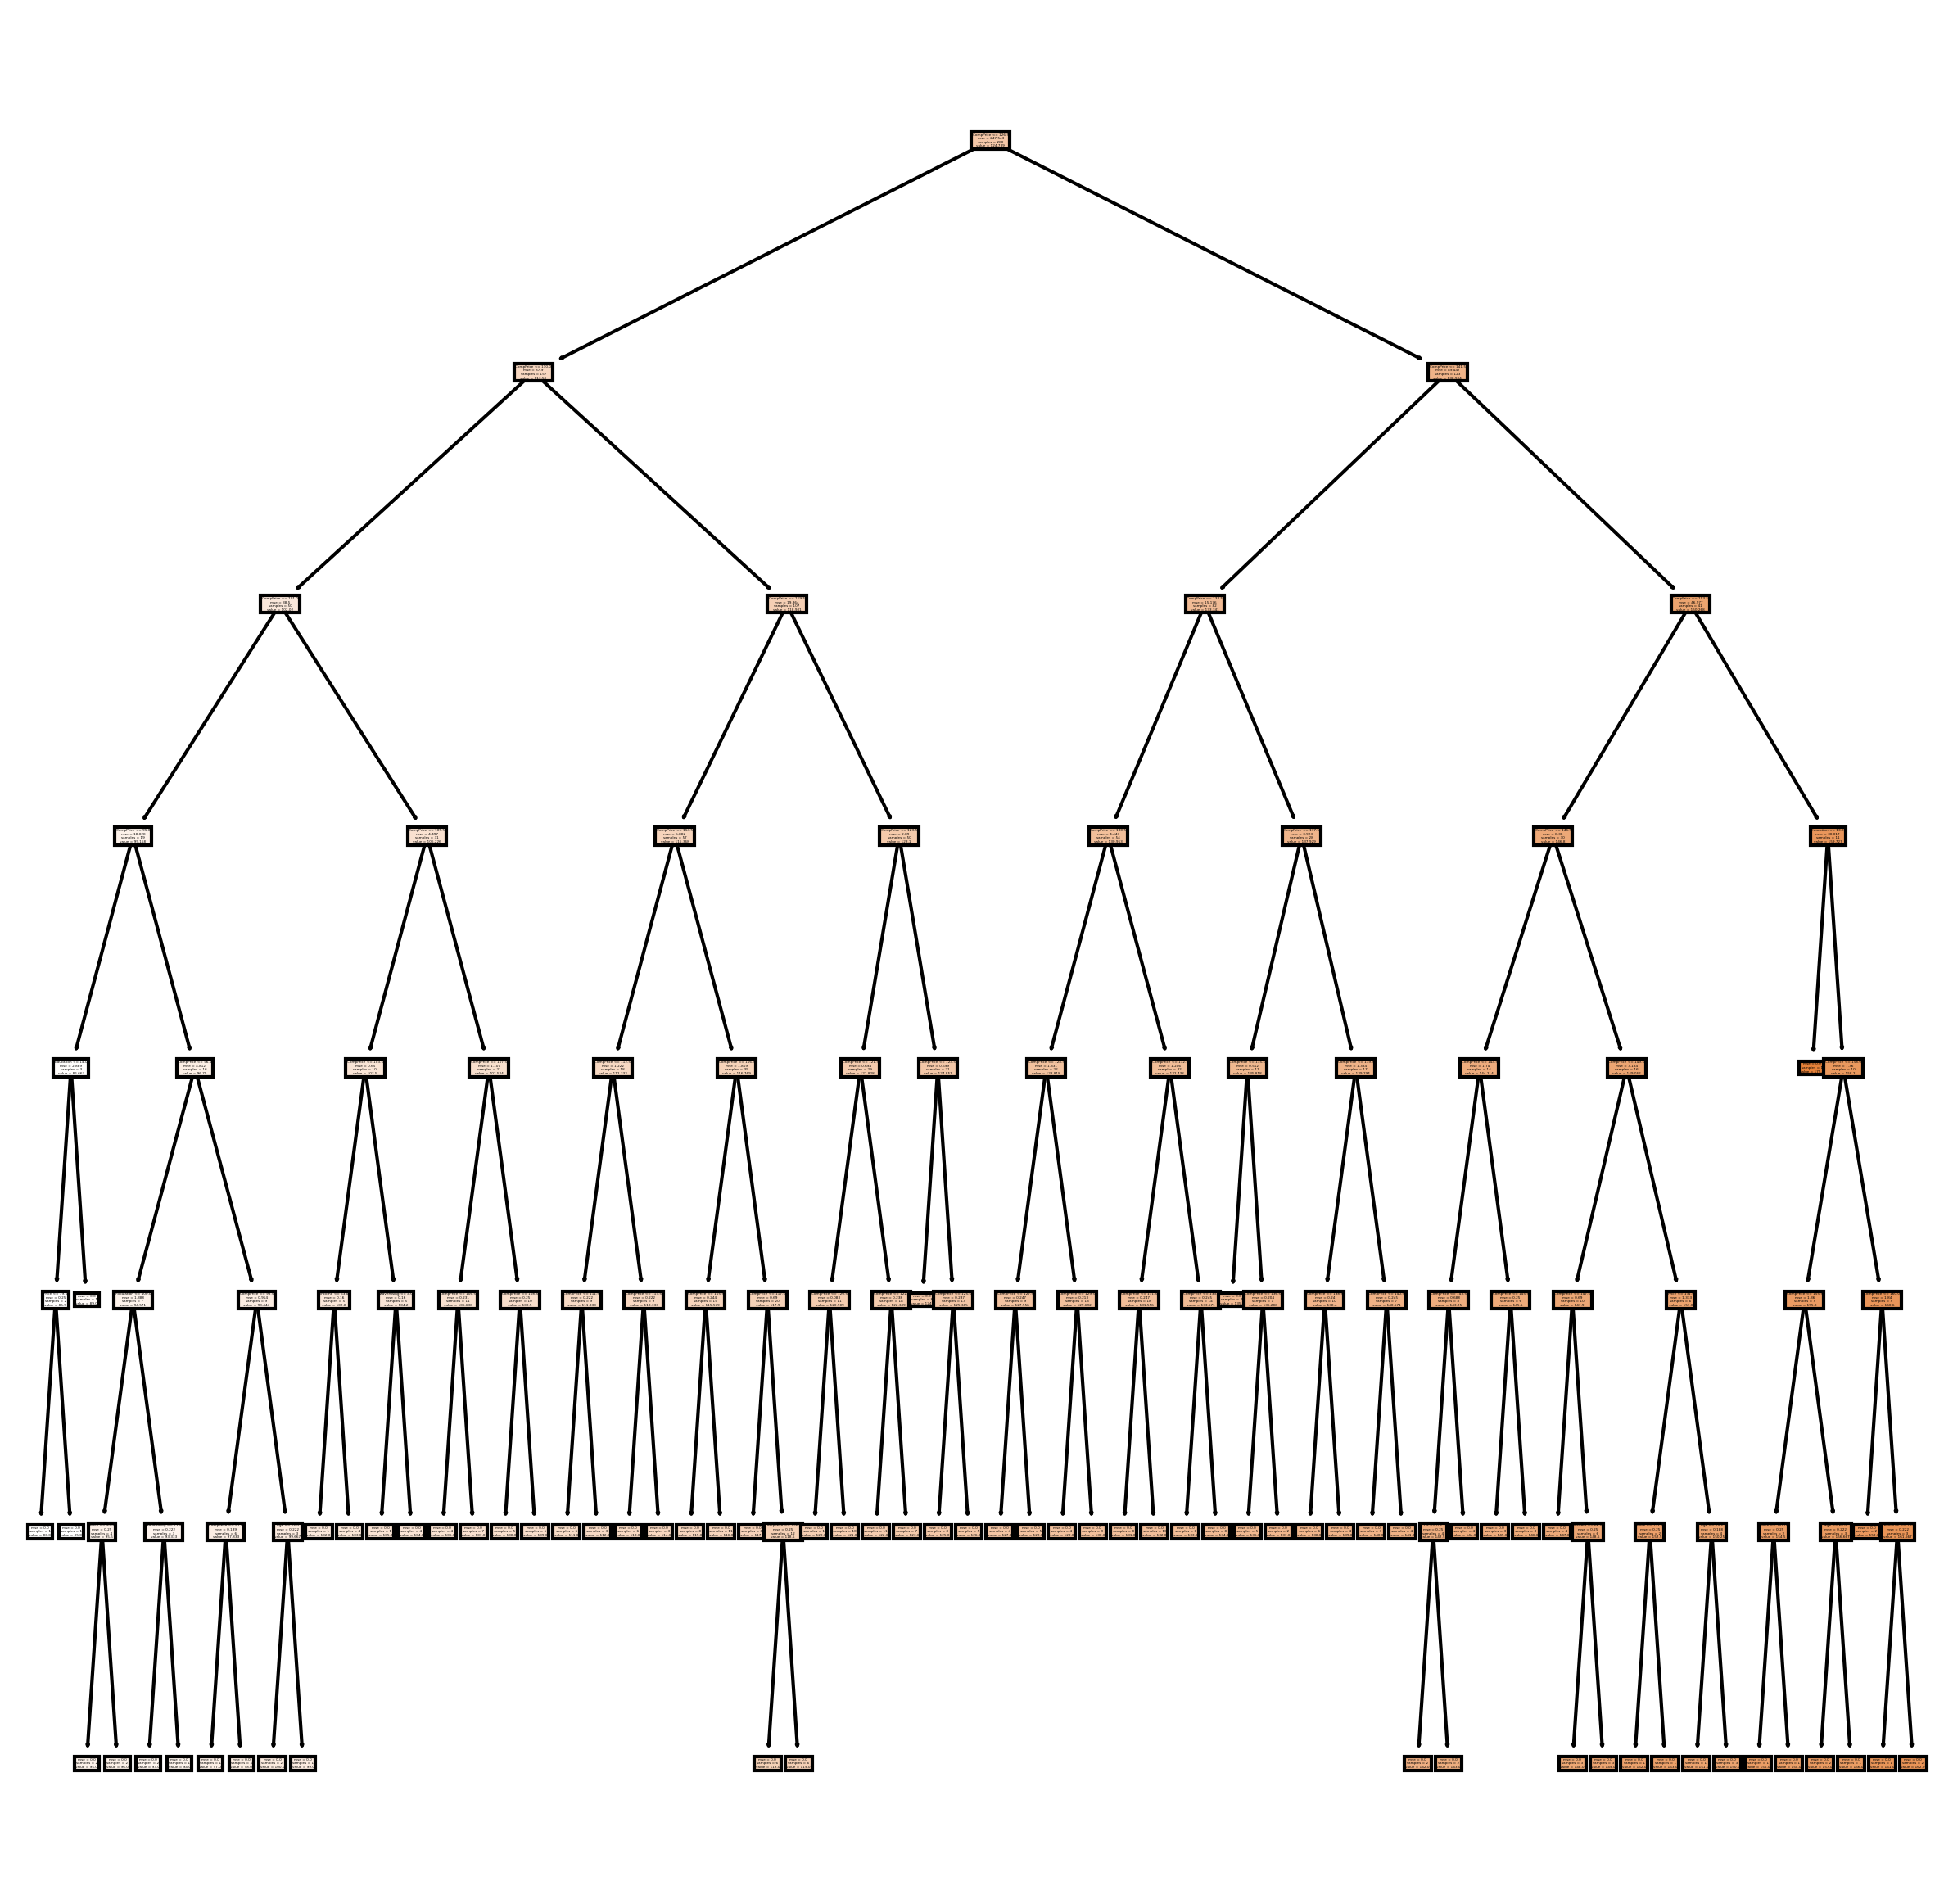

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,feature_names = fn, filled = True) 
plt.show()

In [12]:
feature_importance = pd.Series(model.feature_importances_ , index=fn).sort_values(ascending=False)
feature_importance

CompPrice      0.995822
Education      0.003820
Price          0.000133
Population     0.000116
Income         0.000033
Age            0.000030
Advertising    0.000021
US             0.000014
ShelveLoc      0.000010
Urban          0.000000
dtype: float64

In [13]:
# prediction for test data 
pred_test= model.predict(x_test)

In [14]:
# prediction for train data 
pred_train = model.predict(x_train)

In [18]:
# train accuracy
model.score(x_train,y_train)

1.0

In [19]:
# test accuracy 
model.score(x_test,y_test)

0.9922321920447426

In [17]:
# train accuracy is approximately equal to test accuracy 